Ex 3: Transparency in AI Decision-Making
Objective:
To compare transparent vs. black-box models.

To compare a transparent model (Decision Tree) and a black-box model (Random Forest) using the Heart Disease dataset, and understand how transparency impacts interpretability, trust, and performance.

Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Load the Wine Dataset

In [ ]:
!wget https://archive.ics.uci.edu/static/public/45/heart+disease.zip -P /content/

--2025-08-12 07:09:07--  https://archive.ics.uci.edu/static/public/45/heart+disease.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/content/heart+disease.zip.2’

heart+disease.zip.2     [  <=>               ] 125.87K   287KB/s    in 0.4s    

2025-08-12 07:09:08 (287 KB/s) - ‘/content/heart+disease.zip.2’ saved [128894]



In [ ]:
import zipfile
import os

zip_path = "/content/heart+disease.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

file_path = os.path.join(extract_path, "processed.cleveland.data")
df = pd.read_csv(file_path, header=None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Features & Target

In [8]:
import pandas as pd
import zipfile
import os
import numpy as np

# Download the dataset if it's not present
!wget https://archive.ics.uci.edu/static/public/45/heart+disease.zip -O /content/heart+disease.zip

zip_path = "/content/heart+disease.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

file_path = os.path.join(extract_path, "processed.cleveland.data")
df = pd.read_csv(file_path, header=None)

# Replace '?' with NaN and drop rows with NaN
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=[13]) # Assuming column 13 is the target based on the context and the dataset description
y = df[13].astype(int) # Convert target to integer type
y = y.apply(lambda x: 1 if x > 0 else 0) # Convert to binary target (0 or 1)

--2025-08-12 09:48:19--  https://archive.ics.uci.edu/static/public/45/heart+disease.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/content/heart+disease.zip’

/content/heart+dise     [  <=>               ] 125.87K   325KB/s    in 0.4s    

2025-08-12 09:48:20 (325 KB/s) - ‘/content/heart+disease.zip’ saved [128894]



Split into Train and Test Sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Train Decision Tree (Transparent Model)

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

Train Random Forest (Black-Box Model)

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

Evaluation of both the Models

In [16]:
from sklearn.metrics import accuracy_score

acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

print("Decision Tree Accuracy:", acc_tree)
print("Random Forest Accuracy:", acc_forest)

Decision Tree Accuracy: 0.7666666666666667
Random Forest Accuracy: 0.8666666666666667


Visualizion of Decision Tree

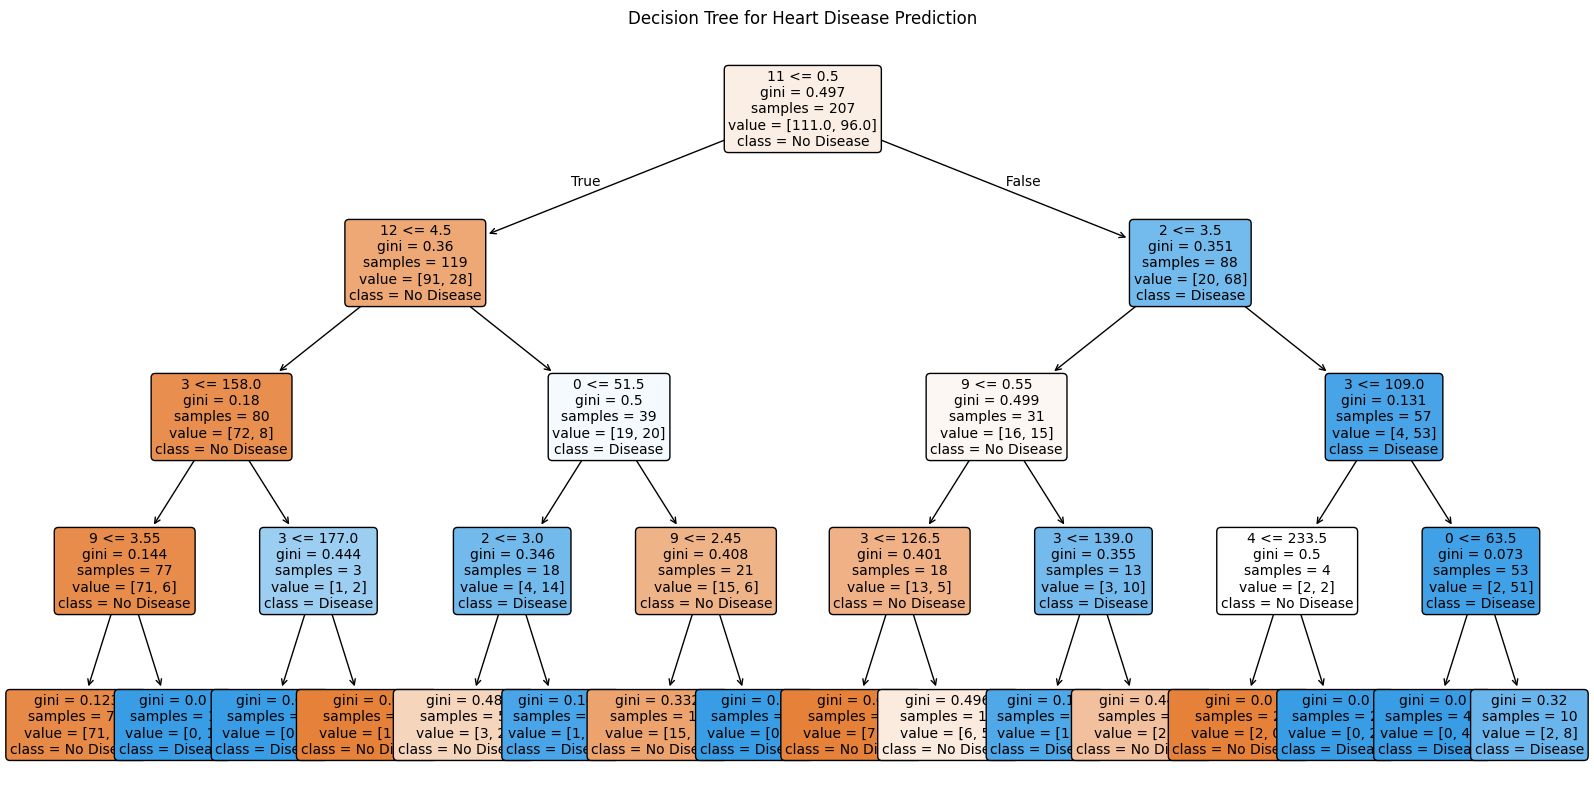

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()

Classification Reports for Deeper Insights

In [20]:
from sklearn.metrics import classification_report

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree, target_names=["No Disease", "Disease"]))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest, target_names=["No Disease", "Disease"]))


Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Disease       0.75      0.86      0.80        49
     Disease       0.79      0.66      0.72        41

    accuracy                           0.77        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.77      0.77      0.76        90

Random Forest Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.92      0.88        49
     Disease       0.89      0.80      0.85        41

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90

